<a href="https://colab.research.google.com/github/Baroka-wp/dive_ML/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN,LSTM
from keras.layers.recurrent import GRU
from keras.datasets import imdb
from keras import backend as K

## "Problème 1" Exécution de diverses méthodes

## SimpleRNN

In [7]:
max_features = 20000
maxlen = 80
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [4]:
batch_size = 32
epochs = 1
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

782/782 [==============================] - 67s 83ms/step - loss: 0.6838 - accuracy: 0.5522 - val_loss: 0.5676 - val_accuracy: 0.7350


In [6]:
score, acc = model.evaluate(x_test, y_test,batch_size=batch_size)
print('score:', score)
print('accuracy:', acc)

782/782 [==============================] - 11s 14ms/step - loss: 0.5676 - accuracy: 0.7350
score: 0.567639946937561
accuracy: 0.7349600195884705


## LSTM


In [7]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [8]:
batch_size = 32
epochs = 1
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

782/782 [==============================] - 222s 281ms/step - loss: 0.4252 - accuracy: 0.8023 - val_loss: 0.3657 - val_accuracy: 0.8395


In [9]:
score, acc = model.evaluate(x_test, y_test,batch_size=batch_size)
print('score:', score)
print('accuracy:', acc)

782/782 [==============================] - 22s 29ms/step - loss: 0.3657 - accuracy: 0.8395
score: 0.3656825125217438
accuracy: 0.8395199775695801


## GRU

In [10]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         2560000   
                                                                 
 gru (GRU)                   (None, 128)               98688     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________


In [11]:
batch_size = 32
epochs = 1
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

782/782 [==============================] - 229s 289ms/step - loss: 0.4512 - accuracy: 0.7801 - val_loss: 0.3571 - val_accuracy: 0.8419


In [12]:
score, acc = model.evaluate(x_test, y_test,batch_size=batch_size)
print('score:', score)
print('accuracy:', acc)

782/782 [==============================] - 19s 24ms/step - loss: 0.3571 - accuracy: 0.8419
score: 0.3571438789367676
accuracy: 0.841920018196106


## ConvLSTM2D

In [20]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
import numpy as np
import pylab as plt
from keras import backend as K

In [25]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),input_shape=(None, 40, 40, 1),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),activation='sigmoid',padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

In [26]:
#Création de données vidéo

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),dtype=np.float)
    for i in range(n_samples):
        n = np.random.randint(3, 8)
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            w = np.random.randint(2, 4)
            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,x_shift - w - 1: x_shift + w + 1,y_shift - w - 1: y_shift + w + 1,0] += noise_f * 0.1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies



In [28]:
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


Epoch 1/3
95/95 [==============================] - 2073s 22s/step - loss: 0.7889 - val_loss: 0.6862
Epoch 2/3
95/95 [==============================] - 2058s 22s/step - loss: 0.7384 - val_loss: 0.7119
Epoch 3/3
95/95 [==============================] - 2069s 22s/step - loss: 0.7035 - val_loss: 0.7682


In [30]:
seq.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,epochs=1, validation_split=0.05)


10/10 [==============================] - 220s 21s/step - loss: 0.6885 - val_loss: 0.7770


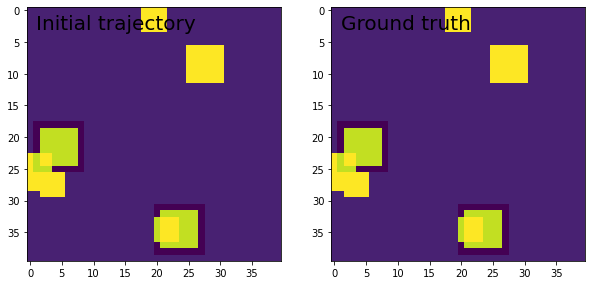

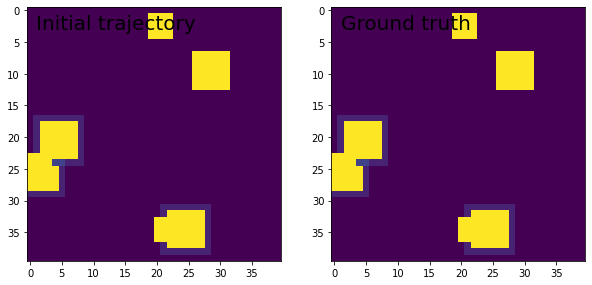

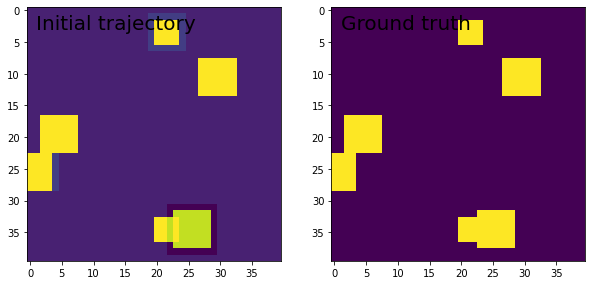

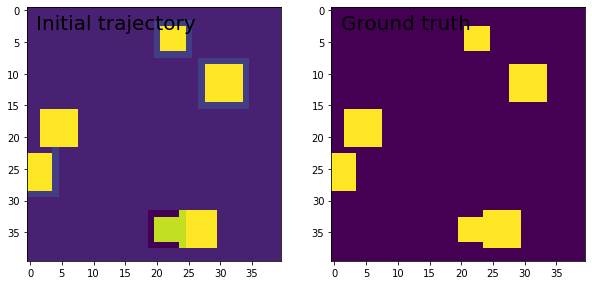

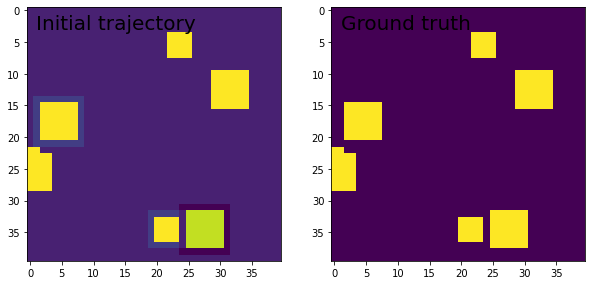

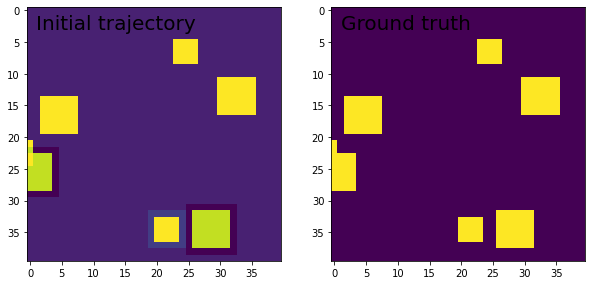

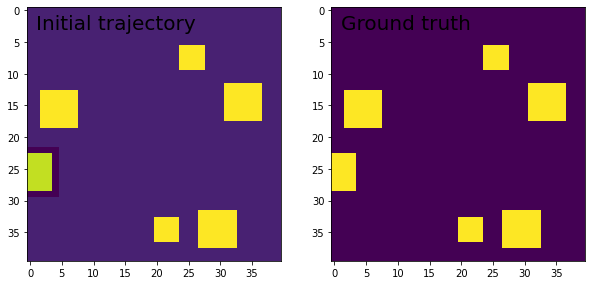

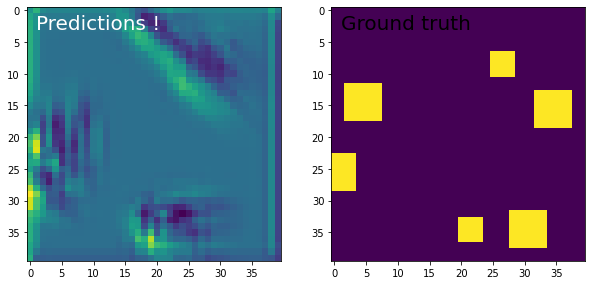

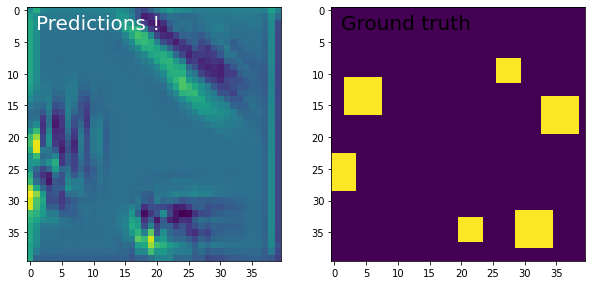

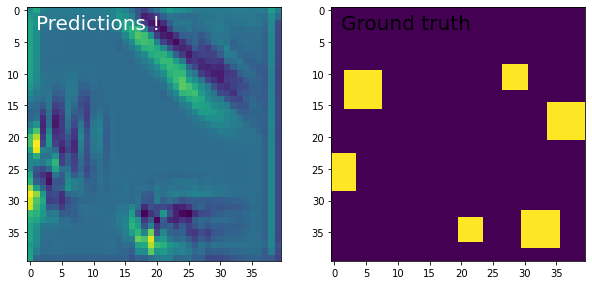

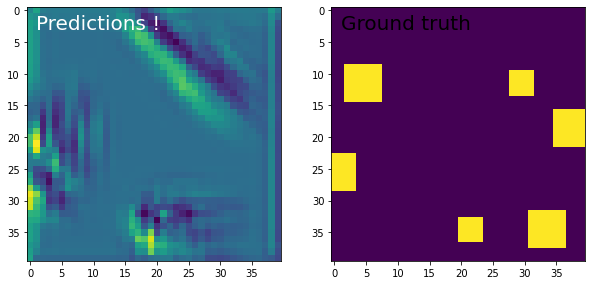

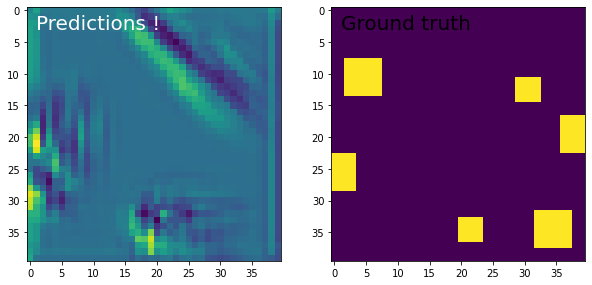

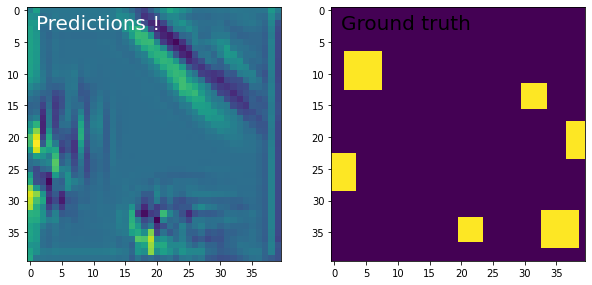

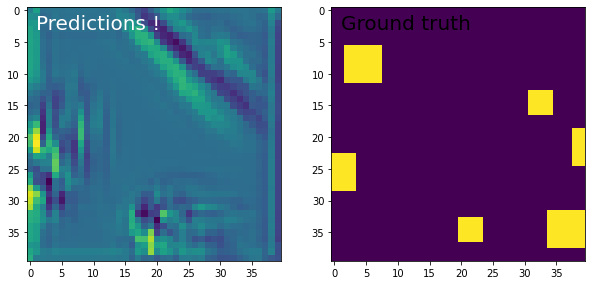

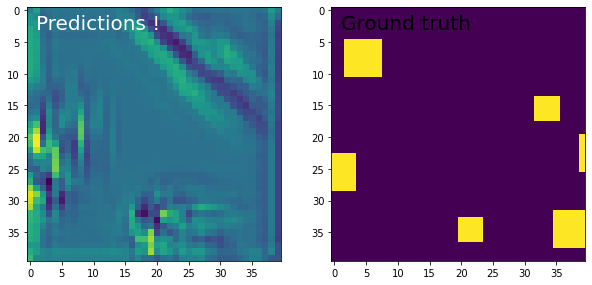

In [31]:
index = 1004
track = noisy_movies[index][:7, ::, ::, ::] 
track2 = noisy_movies[index][::, ::, ::, ::]
for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)
for i in range(15):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)
    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)
    toplot = track[i, ::, ::, 0]
    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)
    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[index][i - 1, ::, ::, 0]
    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## [Problème 2] (Tâche avancée) Comparaison entre plusieurs ensembles de données

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
# One-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
#  Reshape each 28x28 image -> 784 dim. vector
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalization
x_train /= 255
x_test /= 255

In [13]:
model2 = Sequential()
model2.add(Embedding(max_features, 128))
model2.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(10, activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 gru_1 (GRU)                 (None, 128)               98688     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,659,978
Trainable params: 2,659,978
Non-trainable params: 0
_________________________________________________________________


In [14]:
batch_size = 32
epochs = 1
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

1875/1875 [==============================] - 3986s 2s/step - loss: 0.3280 - accuracy: 0.1062 - val_loss: 0.3255 - val_accuracy: 0.0986


In [15]:
score, acc = model2.evaluate(x_test, y_test,batch_size=batch_size)
print('score:', score)
print('accuracy:', acc)

313/313 [==============================] - 66s 211ms/step - loss: 0.3255 - accuracy: 0.0986
score: 0.3255445063114166
accuracy: 0.09860000014305115


## Problème 3 Description des autres classes


- RNN : Un réseau de neurones récurrent (RNN) est une classe de réseaux de neurones artificiels dans lesquels les connexions entre les nœuds forment un graphe orienté dans l'ordre chronologique.

- SimpleRNNCell : classe de cellule de SimpleRNN. Les cellules sont la même structure de réseau qui apparaît de manière récursive.

- GRUCell : une classe de cellules de la couche gru, une unité récursive avec une porte qui simplifie le LSTM.

- LSTMCell : Fondamentalement, une classe Cell pour la couche LSTM, contenant une étape de logique de calcul.

- StackedRNNCells : un wrapper qui fait ressembler la pile de cellules RNN à une seule cellule. Le mot wrapper est utilisé lorsque "le contenu est le même, mais vous souhaitez modifier l'apparence".

- CuDNNGRU : Une implémentation de GRU à grande vitesse utilisant CuDNN.

- CuDNNLSTM : Une implémentation LSTM à grande vitesse utilisant CuDNN.

